In [9]:
using SparseArrays, LinearAlgebra
#using Pkg
#Pkg.activate("../")
using Causality
using Plots

# Generation of Epidemics

In [10]:
T, N = 20.0, 100
#G = Causality.makeBarabasi(N,k=2)
#ρ = 3/N
#G = Causality.makeGNP(N,ρ)
G = Causality.makeProximity(N,2.2/N)
G.A 

100×100 SparseMatrixCSC{IndexedGraphs.NullNumber, Int64} with 638 stored entries:
⠀⠀⠠⢀⠀⢄⠄⡀⠀⠂⠒⠠⠀⠊⠀⡄⡀⡀⢀⠂⠄⠤⠄⠀⠈⠀⠐⠀⢔⠀⠂⠀⢀⢀⠀⠀⠀⠀⠀⠀
⠀⢂⠀⠀⠀⢂⠠⡀⠀⠀⠀⠄⠀⡀⠀⠂⠀⡀⢀⠄⠀⠂⠀⠁⠀⠀⠀⠀⢀⠀⠄⠀⠠⢀⠁⠤⠤⠁⠈⠀
⠀⢄⠠⢀⠀⠀⠐⡀⠀⠄⠐⠀⠀⠀⠂⡄⡀⡀⢀⠀⠐⠀⠀⠂⠀⠀⠀⠁⢀⠁⠐⠐⢁⢀⠂⠀⠐⠂⠈⠀
⠀⠡⠀⠢⠐⠠⢀⠐⠀⠀⠐⡊⠄⠅⠂⠄⠄⠄⠠⠀⢐⠈⠠⠀⠀⠀⠀⠀⠡⠀⠐⠀⢐⠠⠀⢐⣐⠀⠀⠀
⠠⠀⠀⠀⠀⠄⠀⠀⠀⠄⠄⠀⢀⠅⢀⠄⠀⢀⠀⢄⠈⠀⠂⠀⡈⢀⠠⠀⠠⠀⠔⠀⠀⠀⢈⠀⠀⠈⠀⠈
⠘⡀⠀⠄⠐⠀⡰⠠⠀⠁⠊⠀⠀⡀⠂⠀⠀⡀⠄⠃⡰⢀⠠⢀⢀⠀⠌⠠⡈⢀⠳⠀⠤⠀⠢⠠⠴⠠⠠⠣
⡠⠀⠀⠠⠀⠀⠄⠅⠄⠔⠀⠠⠀⠀⠐⠀⠀⠐⠀⠐⠠⠠⠈⠀⢢⠐⠠⠀⠤⠀⠀⠀⠀⠠⠐⠀⠀⠠⠀⠄
⠀⠤⠠⠀⠈⠤⠈⠄⠀⠔⠈⠀⠐⠀⠀⠀⠄⠐⠠⠐⠈⠀⠄⠁⠀⠐⠀⡀⠀⡀⠈⠈⠠⠀⠁⠀⠈⠁⡀⠁
⠀⠨⠀⠠⠀⠨⠀⠅⠀⢀⠀⠠⢀⠀⢀⠁⠀⠀⠨⢀⠄⠀⠀⠠⡀⢀⠐⠀⠨⠠⠀⠀⠈⠠⢀⠀⠀⠀⠀⠀
⠠⠐⠀⠔⠀⠐⠀⠂⠀⢄⠤⠁⢀⠀⢀⠂⠂⢂⠀⠀⠀⠀⠈⠀⡀⢀⠡⠈⠐⠀⠄⠀⠑⠐⢈⠀⠀⠀⠨⠈
⠀⡅⠠⠀⠐⠀⡐⠐⠂⠀⠐⢊⠀⡂⠂⠀⠀⠁⠀⠀⡀⠈⠄⠈⢐⠀⠀⠀⡁⠈⠐⠀⠐⠀⠐⠐⠐⠐⠀⠐
⠀⠁⠄⠀⠠⠀⠀⠂⠈⠀⠀⢂⠂⠀⠄⠁⠀⡀⠂⠀⡀⠁⠀⠀⠀⠀⠂⠐⠀⢀⠨⠀⠂⠀⠔⠀⠀⠔⠐⠔
⠂⠀⠀⠀⠀⠀⠀⠀⠂⢈⠀⠐⢈⠒⢀⠀⠀⢈⠀⢈⠐⠐⠀⠀⡀⠈⠀⠀⠂⠀⠀⠡⠀⠀⢈⠄⠀⠐⠠⠀
⠐⠀⠀⠀⠄⠀⠀⠀⠀⠂⠂⡁⠀⠂⠀⠠⠐⠀⡁⠂⠀⠀⢈⠀⠀⠀⡀⠈⠐⠄⠂⠀⡁⠀⢀⠀⠀⢀⢀⢂
⠐⠑⠀⠐⠄⠐⠁⠂⠀⠂⠂⢈⠀⠃⠀⠠⠂⡂⠐⠀⡁⠈⠀⢀⠈⠀⠐⠄⠀⠀⠀⠀⠀⠐⠀⠀⠀⠀⠄⠂
⠈⠀⠀⠁⢐⠀⠐⠀⠐⠁⠙⠂⠀⠀⡂⠀⠀⠀⠀⠁⠐⠀⠂⠂⠄⡀⠈⠀⠀⠀⢀⠐⠀⠀⡢⠀⠐⡂⠀⠀
⠀⢐⠀⢂⠁⢐⠐⡐⠀⠀⠀⠃⠀⡀⠀⠂⠂⡀⢑⠀⠐⠀⠈⠀⠀⠀⠁⠈⢀⠀⠀⠀⠀⠀⠀⠰⠖⠀⠈⠀
⠀⠀⠁⡄⠈⠀⢀⢀⠂⠐⠈⡂⠐⠀⠁⠀⠀⠐⠂⠐⢐⠀⠐⠁⠂⠔⠀⠐⠀⠀⠈⠊⢀⡀⠀⠀⣈⠑⠐⠑
⠀⠀⠄⠃⠰⠀⠐⠘⡀⠀⠐⡃⠀⡀⠆⠀⠀⠀⠀⠀⢐⠀⢀⠄⢀⠀⠀⢀⠀⠀⠰⠠⠘⠁⢆⠘⠰⠂⢀⢀
⠀⠀⠂⠀⠂⠀⠀⠀⡀⠀⠤⡂⠀⠄⠄⠈⠀⠀⡂⠂⢀⠀⢐⠄⠀⠂⠠⢐⠠⠁⠀⠀⠂⠀⢔⠀⠀⢐⢀⠐

In [11]:
getpar(pseed,autoinf::GaussianRate,inf_in::GaussianRate) = 
    [fill(pseed, 1, N);
     fill(autoinf.a, 1, N); fill(autoinf.b, 1, N); fill(autoinf.c, 1, N);
     fill(inf_in.a,   1, N); fill(inf_in.b, 1, N); fill(inf_in.c, 1, N);
    ]

getpargen(pseed, autoinf::GaussianRate, inf_out::GaussianRate) = 
    [pseed autoinf.a autoinf.b autoinf.c inf_out.a inf_out.b inf_out.c]


getpargen (generic function with 1 method)

In [12]:
#Initialize generation parameters
λ = 0.2
pseed = 5/N
ε = 1e-3
autoinf = GaussianRate(ε, T/2, 3T);
inf_in = GaussianRate(1.0, T/2, 3T)
inf_out = GaussianRate(λ, T/2, 3T)

θp = getpar(pseed, autoinf, inf_in);
θpgen = getpargen(pseed, autoinf, inf_out);

In [13]:
#Initialize min/max boundaies
T = Float64(T)
pseed_min = ε
pseed_max = 1-ε
rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(1/ε  ,  2T,   1/ε)

θmin = getpar(pseed_min , rate_min, rate_min);
θmax = getpar(pseed_max , rate_max, rate_max);

rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(1/ε  ,  T,   T)

θgenmin = getpargen(pseed_min, rate_min, rate_min);
θgenmax = getpargen(pseed_max, rate_max, rate_max);

In [14]:
const Igen = GenerativeSI{GaussianRate,GaussianRate} 
const Igauss = GaussianInferentialSI

GaussianInferentialSI

In [15]:
Mp = StochasticModel(Igen, T, θp, G, θpgen);
sample! = Sampler(Mp);

xtrue = zeros(N)
sample!(xtrue)
nobs, p = 500, 1e-5
#nobs, p = N, 1e-5
O = [(i = rand(1:N); ti = T*rand(); (i,xtrue[i] < ti,ti,p)) for r=1:nobs]
sum(xtrue .< T)/N

0.85

# CVA inference of Infection Hyperparameters

In [17]:
lattice_size = 3
F_lattice = zeros(lattice_size,lattice_size);

In [18]:
#Softened model
T = Float64(T)
inf_in = GaussianRate(1., T/2, 3*T );
ε = 1e-3
autoinf = GaussianRate(ε, T/2, T);


pseed_min = 1/(10*N)
pseed_max = 0.1
inf_min = 0.01
inf_max = 0.2
pseed, inf_out = pseed_min, GaussianRate(inf_min, T/2, 3*T)

step_inf = (inf_max - inf_min) / (lattice_size)
step_seed = (pseed_max - pseed_min) / (lattice_size)

for iinf in 1:lattice_size
    pseed = pseed_min
    for iseed in 1:lattice_size
        θp2gen = getpargen(pseed, autoinf, inf_out);
        θp2 = getpar(pseed, autoinf, inf_in);
        Mp2 = StochasticModel(Igen, T, θp2, G, θp2gen);
        θ = getpar(pseed, autoinf, inf_in);
        M = StochasticModel(Igauss, T, θ, G, θp2gen);
        descend!(Mp2, O; M=M, numsamples=600, numiters=100, 
             θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.1),
             hyperdescender=SignDescender(0.),hyper_mask=[2,3,4,6,7]);
        F_lattice[iinf,iseed] = descend!(Mp2, O; M=M, numsamples=600, numiters=100, 
             θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.02),
             hyperdescender=SignDescender(0.),hyper_mask=[2,3,4,6,7]);
        pseed += step_seed
    end
    inf_out = GaussianRate(inf_min + iinf*step_inf, T/2, 3*T)
end

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter ~/.julia/packages/ProgressMeter/Vf8un/src/ProgressMeter.jl:620
Progress: 100%|█████████████████████████████████████████| Time: 0:00:24
  F:  133.7231481683355


In [ ]:
#now we do the descent
path = zeros(2,200)
pseed, inf_out = 5/N , GaussianRate(0.2, T/2, 9*T) #initial point
θp2gen = getpargen(pseed, autoinf, inf_out);
θp2 = getpar(pseed, autoinf, inf_in);
Mp2 = StochasticModel(Igen, T, θp2, G, θp2gen);
θ = getpar(pseed, autoinf, inf_in);
M = StochasticModel(Igauss, T, θ, G, θp2gen);
for st = 1:100
     descend!(Mp2, O; M=M, numsamples=600, numiters=1, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.1),
         hyperdescender=SignDescender(0.1),hyper_mask=[2,3,4,6,7]);
     path[1,st] = M.θgen[1]
     path[2,st] = M.θgen[5]
end
for st = 101:200
     descend!(Mp2, O; M=M, numsamples=600, numiters=1, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.02),
         hyperdescender=SignDescender(0.02),hyper_mask=[2,3,4,6,7]);
     path[1,st] = M.θgen[1]
     path[2,st] = M.θgen[5]
end

In [ ]:
using Plots
heatmap(LinRange(pseed_min,pseed_max,lattice_size),LinRange(inf_min,inf_max,lattice_size),((F_lattice)), xlabel="pseed", ylabel="infection peak",title="Heat map for free energy in function of hyperparams")
plot!(path[1,1:end],path[2,1:end],label="descent")
scatter!(path[1,1:1],path[2,1:1],label="initial point")
scatter!(path[1,end:end],path[2,end:end],label="final point")
scatter!([Mp.θgen[1],],[Mp.θgen[5],],label="true solution")
#savefig("descentVSmap")

# A study on parameters variation

In [ ]:
pseed = 3/N
ε = 1e-6
final_st = 1
lam = LinRange(0.04,0.4,15)
infer_lam = zeros(length(lam))
n_infected = zeros(length(lam))
for st = 1:final_st
    for lam_num = 1:length(lam)
        λ = lam[lam_num] 
        autoinf = GaussianRate(ε, T/2, 6T);
        inf_in = GaussianRate(1.0, T/2, 6T)
        inf_out = GaussianRate(λ, T/2, 6T)

        θp = getpar(pseed, autoinf, inf_in);
        θpgen = getpargen(pseed, autoinf, inf_out);


        Mp = StochasticModel(Igen, T, θp, G, θpgen);
        sample! = Sampler(Mp);
        nobs, p = 900, 1e-5
        ni = 0
        while ni<0.1 || ni>0.99
            sample!(xtrue)
            ni = sum(xtrue .< T) / N
            #@show ni           
        end
        n_infected[lam_num] += ni/final_st 
        O = [(i = rand(1:N); ti = T * (1.0 + rand())/2; (i,xtrue[i] < ti,ti,p)) for r=1:nobs]
        θp2gen = getpargen(pseed, autoinf, inf_out);
        θp2 = getpar(pseed, autoinf, inf_in);
        Mp2 = StochasticModel(Igen, T, θp2, G, θp2gen);
        θ = getpar(pseed, autoinf, inf_in);
        M = StochasticModel(Igauss, T, θ, G, θp2gen);
        descend!(Mp2, O; M=M, numsamples=400, numiters=100, 
             θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.1),
             hyperdescender=SignDescender(0.1),hyper_mask=[1,2,3,4,6,7]);
        Causality.newdescend!(Mp2, O; M=M, numsamples=400, numiters=100, 
             θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.02),
             hyperdescender=SignDescender(0.02),hyper_mask=[1,2,3,4,6,7]);
        infer_lam[lam_num] += M.θgen[5] / final_st
    end
end

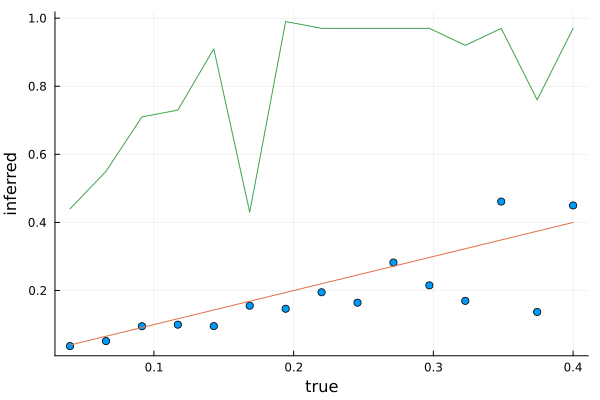

In [259]:
using Plots
scatter(lam,infer_lam,xlabel="true",ylabel="inferred",legend=false)
plot!(lam,lam)
plot!(lam,n_infected)

In [260]:
using DelimitedFiles
open("../Hyperparams/2lam0.04_0.4.txt","w") do io
    writedlm(io,infer_lam) 
end

open("../Hyperparams/2lam0.04_0.4infected.txt","w") do io
    writedlm(io,n_infected) 
end